# Estatística

### Conjunto Único de Dados

In [1]:
from collections import Counter
from matplotlib import pyplot as plt
import random
import math
import numpy as np

In [2]:
# Gerar uma lista de 1000 números inteiros aleatórios entre 1 e 100
num_friends = [random.randint(1, 100) for _ in range(300)]

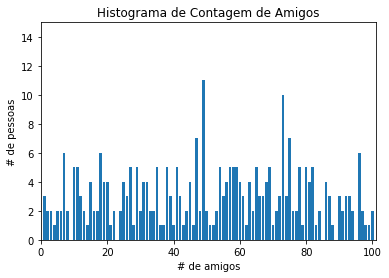

In [3]:
friends_counts = Counter(num_friends)
xs = range(101)
ys = [friends_counts[x] for x in xs]
plt.bar(xs, ys)
plt.axis([0, 101, 0, 15])
plt.title("Histograma de Contagem de Amigos")
plt.xlabel("# de amigos")
plt.ylabel("# de pessoas")
plt.show()

### Tendência Central

In [4]:
# média
def mean(x):
    return sum(x) / len(x)

In [5]:
mean(num_friends)

50.413333333333334

In [6]:
# mediana
def median(v):
    """Valor mais ao meio de (v)"""
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2
    
    # se impar, retorna valor central
    # se par, retorna média dos valores centrais
    if n % 2 == 1:
        return sorted_v[midpoint]
    else:
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2

In [7]:
median(num_friends)

51.5

In [8]:
def quantile(x, p):
    # Retorna o valor percentual p-ésimo em x
    p_index = int(p *len(x))
    return sorted(x)[p_index]

In [9]:
quantile(num_friends, 0.10)

12

In [10]:
quantile(num_friends, 0.20)

22

In [11]:
quantile(num_friends, 0.25)

28

In [12]:
quantile(num_friends, 0.50)

52

In [13]:
quantile(num_friends, 0.75)

73

In [14]:
quantile(num_friends, 0.90)

86

In [15]:
quantile(num_friends, 0.99)

99

In [16]:
def mode(x):
    # Retorna lista, pode haver mais de uma moda
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
            if count == max_count]

In [17]:
mode(num_friends)

[49]

### Dispersão

In [18]:
# amplitude
def data_range(x):
    return max(x) - min(x)

In [19]:
data_range(num_friends)

99

Variância: Mede como uma única variável desvia de sua média

In [20]:
def sum_of_squares(numbers):
    return sum(x**2 for x in numbers)

# variância
def de_mean(x):
    # desloca 'x' ao subtrair sua média, então o resultado tem a média 0
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def variance(x):
    # presume x com ao menos 2 elementos
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n -1)

In [21]:
variance(num_friends)

727.2466443701228

In [22]:
def standart_deviation(x):
    return math.sqrt(variance(x))

In [23]:
standart_deviation(num_friends)

26.967510904236654

### Correlação

Covariância: Mede como duas variáveis se comportam em conjunto de suas médias.

In [24]:
friends = [70, 65, 72, 63, 71, 64, 60, 64, 67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]

In [25]:
def covariance(x, y):
    n = len(x)
    return np.dot(de_mean(x), de_mean(y)) / (n - 1)

In [26]:
covariance(friends, minutes)

148.19444444444446

In [27]:
def correlation(x, y):
    stdev_x = standart_deviation(x)
    stdev_y = standart_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0

In [28]:
correlation(friends, minutes)

0.9224638302166004